In [1]:
import scipy
import numpy as np

scipy.__version__ # версия библиотеки

'1.7.3'

**Интегрирование**

In [2]:
from scipy.integrate import quad, dblquad, tplquad

Численное вычисление оппределенного интеграла
$$\int f(x)dx $$
называется числовой квадратурой или просто квадратурой.
Scipy предоставляет ряд функций для различных видов квадратур, например quad,dblquad и tplquad для одиночных, двойных и тройных интегралов соотвественно.

In [3]:
f=lambda x: np.exp(-x**2)
a=0;b=1
integr, abs_err=quad(f,a,b)
print(f"Значение {integr},абсолютная погрешность {abs_err}")

Значение 0.7468241328124271,абсолютная погрешность 8.291413475940725e-15


При необходимости передать дополнительные аргументы используется кортеж args, передаваемой функции quad()

In [4]:
f=lambda x,n: x**n
a=0;b=1
integr, abs_err=quad(f,a,b,args=(3,))
print(f"Значение{integr},абсолютная погрешность{abs_err}")

Значение0.25,абсолютная погрешность2.7755575615628914e-15


**Кратные интегралы реализуются по схожей схеме**

In [5]:
f=lambda x,y: np.exp(-x**2-y**2)
inteqr, abs_err=dblquad(f,-np.Inf, np.Inf, lambda x: -np.Inf,lambda x:x)
print(f"Значение{integr},абсолютная погрешность{abs_err}")

Значение0.25,абсолютная погрешность1.4890365878106507e-08


Scipy предоставляет два разных способа решения дифференциальных уравнений : в императивном подходе, основанном на функции odeint, и объектно-ориентированном подходе, основанном на классе ode.
Мы будем использовать функцию odeint. Для получения информации о классе ode можно выполнить help(ode). Объекты этого клачча делают почти то же самое, что и odeint, но в рамках объектно-ориентрованной парадигмы.
Чтобы использовать odeint, сначала необходимо импортировать его из модуля scipy.integrate.

In [6]:
from scipy.integrate import odeint, ode

Система записывается в нормальной форме
$$y'=f(y,t)$$
где $y=[y_1(t),y_2(t),...,y_n(t)]$ и f- некоторая функция описывающая часть системы. Чтобы решить систему дифференциальных уровнений, необходимо задать функцию f и начальные условия y(0).
После определения функции Python f и массива y0 (для описания f(y,t) и y((0)), можно использовать odeint:
y_t=odeint(f,y_0,t)
где t- массив с координатами времени, для которых необходимо решать задачу Коши. y_t - это массив с одной строкой для каждого момента времени в t, где каждый столбец соотвествует решению $y_i(t)$ в этот момент времени.

**Пример.Затухающий осцилятор**


In [7]:
def f(y,t,zeta,w0):
    """
    Правая часть уравнения
    """
    x,p=y[0],y[1]
    dx=p
    dp=-2*zeta*w0*p-w0**2*x
    return[dx,dp]

In [8]:
#начальные условия
y0=[1.0,0.0]

In [9]:
#сетка по времени для интегрирования
t=np.linspace(0,10,1000)
w0=2*np.pi*1.0

In [10]:
#Решение задачи Коши для различных значений коэффициента демпфирования
y1=odeint(f,y0,t, args=(0.0, w0)) #undamped
y2=odeint(f,y0,t,args=(0.2,w0)) #under damped
y3=odeint(f, y0, t, args=(1.0,w0)) #crtial damping
y4=odeint(f,y0,t,args=(5.0, w0)) #over damped

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Image

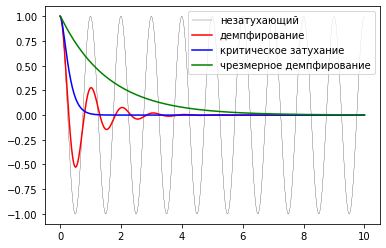

In [12]:
fig,ax=plt.subplots()
ax.plot(t,y1[:,0],'k',label="незатухающий", linewidth=0.25)
ax.plot(t,y2[:,0],'r',label="демпфирование")
ax.plot(t,y3[:,0],'b', label="критическое затухание")
ax.plot(t,y4[:,0],'g',label="чрезмерное демпфирование")
ax.legend();

**Оптимизация**

Оптимизация-(поиск экстремумов функции)- важная область математики. Задача многомерной оптимизации может быть достаточно не простой. Рассмотрим только несколько очень простых случаев.
Чтобы использовать модуль оптимизации в scipy, необходим модуль optimize:

In [13]:
from scipy import optimize

**Нахождение минимального значения**
Минимум функции одной переменной

In [14]:
def f(x):
    return 4*x**3+(x-2)**2+x**4

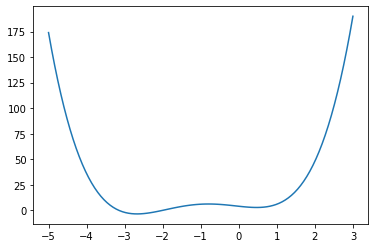

In [15]:
fig,ax=plt.subplots()
x=np.linspace(-5,3,100)
ax.plot(x,f(x));

Для нахождения минимума функции используется fmin_bfgs.

In [16]:
x_min= optimize.fmin_bfgs(f,-2)
x_min

Optimization terminated successfully.
         Current function value: -3.506641
         Iterations: 5
         Function evaluations: 16
         Gradient evaluations: 8


array([-2.67298155])

Мы можем использовать функции brent() или fminbound(). У них немного другой синтаксис и используют другие алгоритмы.

In [17]:
optimize.brent(f)

0.46961743402759754

In [18]:
optimize.fminbound(f,-4,-2)

-2.672982383464819

**Нахождение корней функции**

ДЛя нахождения корне функции f(x)=0 используетс\ функция fsolve(), которая требует начального приближения.

In [19]:
def f(x):
    return np.tan(x)-2.0/x

(-10.0, 10.0)

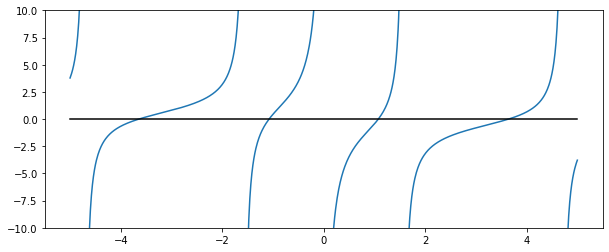

In [20]:
fig, ax=plt.subplots(figsize=(10,4))
x=np.linspace(-5,5,1000)
y=f(x)
mask=np.where(abs(y)>50)
x[mask]=y[mask]=np.NaN
ax.plot(x,y)
ax.plot([-5,5],[0,0],'k')
ax.set_ylim(-10,10)

In [21]:
optimize.fsolve(f,0.1)

array([1.07687399])

In [22]:
optimize.fsolve(f,2)

array([3.64359717])

In [23]:
optimize.fsolve(f,-4)

array([-3.64359717])

**Интерполяция**

Интерполяция в scipy реализуется простой функцией interpld, когда заданы массивы, описывающие данные X и Y, возвращает и объект ведет себя как функция, которая может быть вызвана для произвольного значения x (в диапозоне, охватываемом X), и возвращает соответствующее интерполированное значение y.

In [24]:
from scipy.interpolate import *

**Примеры**

Построение линейной и кубической интерполяций функции f(x)=sin x по 10 точкам

In [25]:
def f(x):
    return np.sin(x)

In [26]:
n = np.arange(0,10)
x = np.linspace(0,9,100)

y_meas=f(n)
y_real=f(x)

linear_interpolation= interp1d (n,y_meas)
y_interpl=linear_interpolation(x)

cubic_interpolation=interp1d(n,y_meas, kind='cubic')
y_interp2=cubic_interpolation(x)

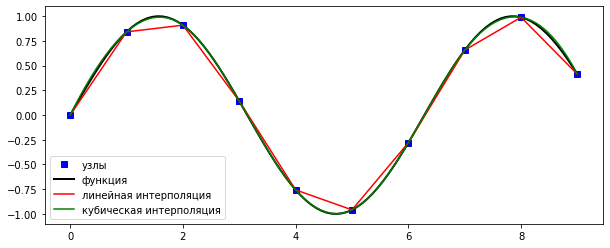

In [27]:
fig,ax=plt.subplots(figsize=(10,4))
ax.plot(n,y_meas,'bs',label='узлы')
ax.plot(x,y_real,'k',lw=2,label='функция')
ax.plot(x,y_interpl, 'r',label='линейная интерполяция')
ax.plot(x,y_interp2, 'g', label='кубическая интерполяция')
ax.legend(loc=3)

**Статистика**

Модуль scipy.stats содержит большое количество вероятностных распределений, статистических функций и тестов

In [28]:
from scipy import stats

Пример

Создать объект, описывающий дискретное случайное распределение Пуассона

$$P({X=k})=\frac{{\lambda}^k}{k!}*e^{-\lambda}$$

с параметром $\lambda=3.5$

In [29]:
X=stats.poisson(3.5)

(array([143., 176., 195., 203., 143.,  80.,  34.,  14.,  11.,   1.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <BarContainer object of 10 artists>)

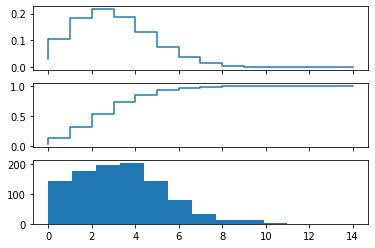

In [30]:
n=np.arange(0,15)
fig,axes=plt.subplots(3,1,sharex=True)
#Построение ряда распределения
axes[0].step(n,X.pmf(n))
#построение функции распределения
axes[1].step(n,X.cdf(n))
#Построение гисторгаммы 1000 случайных реализаций случайной величины
axes[2].hist(X.rvs(size=1000))

Создать объект, описывающий стандартное нормальное распределение

In [31]:
Y=stats.norm()

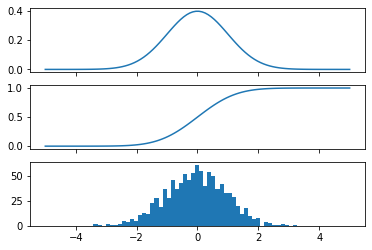

In [32]:
x=np.linspace(-5,5,100)
fig,axes=plt.subplots(3,1, sharex=True)
#Построение плотности распределения вероятностей (PDF)
axes[0].plot(x,Y.pdf(x))
#Построение функции распределения вероятностей (CDF)
axes[1].plot(x,Y.cdf(x));
#Построение гистограмы 1000 случайных реализаций случайных величин
axes[2].hist(Y.rvs(size=1000), bins=50);

Распределение Пуассона

In [33]:
X.mean(),X.std(),X.var()

(3.5, 1.8708286933869707, 3.5)

Нормальное распределение

In [34]:
Y.mean(),Y.std(), Y.var()

(0.0, 1.0, 1.0)

**Статистические тесты**

Пример

Проверка гипотезы о равенстве математических ожиданий двух независимых выборок с помощью критерия Стьюдента. Нулевая гипотеза: математические ожидания равны, конкурирующая гипотеза - не равны

In [35]:
t_statistic, p_value=stats.ttest_ind(X.rvs(size=1000), X.rvs(size=1000))
print(f"t-statistic={t_statistic}")
print(f"p-value={p_value}")

t-statistic=-0.4386978367164405
p-value=0.6609279265380268


Поскольку значение p>0.05, мы принимаем гипотезу о равенстве срезних значений.


Чтобы проверить, имеет ли среднее значение одной выборки данных среднее значение 0,1 (истинное среднее значение равно 0.0

In [36]:
stats.ttest_1samp(Y.rvs(size=1000), 0.1)

Ttest_1sampResult(statistic=-2.466696026191384, pvalue=0.013803511627794298)

Малое значение p означает, что мы можем отвергнуть гипотезу о том, что среднее значение Y равно 0.1 

In [37]:
Y.mean()

0.0

In [38]:
stats.ttest_1samp(Y.rvs(size=1000),Y.mean())

Ttest_1sampResult(statistic=0.5803584746338266, pvalue=0.5618037813723988)

Значение p велико, поэтому мы принимаем гипотезу о равенстве средних значений